In [2]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread("C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\test_images\\test1.png")
img.shape

(1214, 1000, 3)

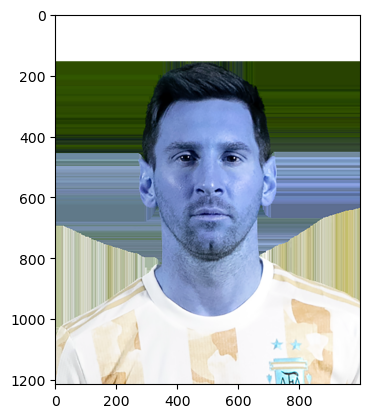

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(1214, 1000)

In [6]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [223, 237, 240, ..., 246, 246, 246],
       [226, 238, 240, ..., 246, 246, 246],
       [227, 238, 239, ..., 246, 246, 246]], dtype=uint8)

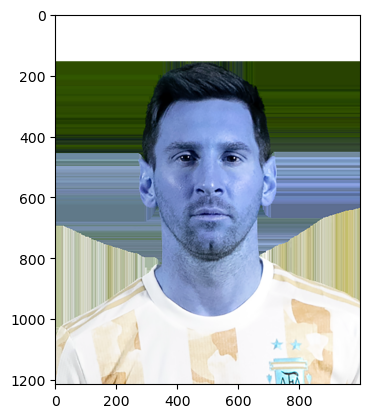

In [7]:
plt.imshow(img , cmap='gray')

In [8]:
import cv2

face_cascade = cv2.CascadeClassifier('C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\OpenCV\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\OpenCV\\haarcascade_eye.xml')

if face_cascade.empty():
    print("Error loading face cascade")
if eye_cascade.empty():
    print("Error loading eye cascade")


In [9]:
faces = face_cascade.detectMultiScale(gray , 1.3 , 5)

In [10]:
faces

array([[285, 292, 453, 453]])

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(285, 292, 453, 453)

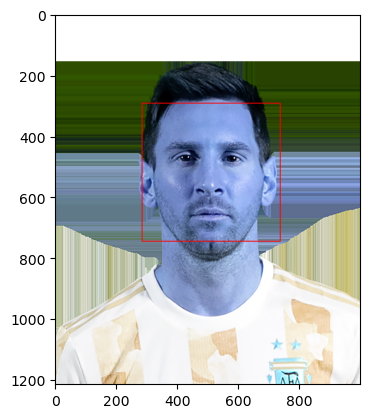

In [12]:
face_img = cv2.rectangle(img , (x,y) , (x+w , y+h),(255,0,0),2)
plt.imshow(face_img)

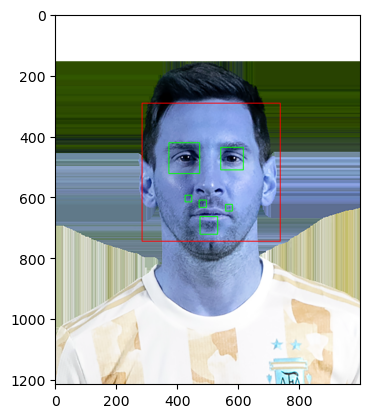

In [13]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = face_img[y:y+h , x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20)) 
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color , (ex,ey) , (ex+ew , ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img , cmap='gray')
plt.show()

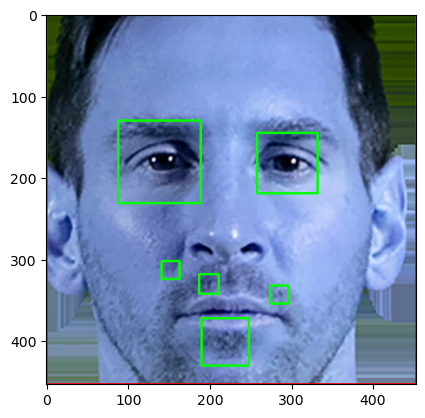

In [14]:
%matplotlib inline
plt.imshow(roi_color , cmap = 'gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray , 1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

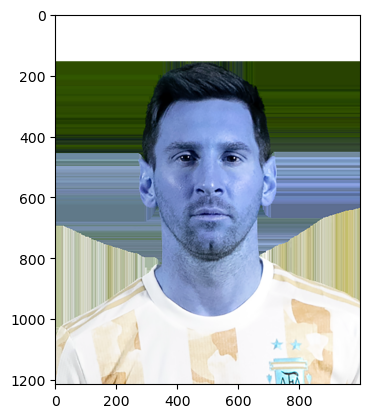

In [16]:
original_image = cv2.imread("C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\test_images\\test1.png")
plt.imshow(original_image)

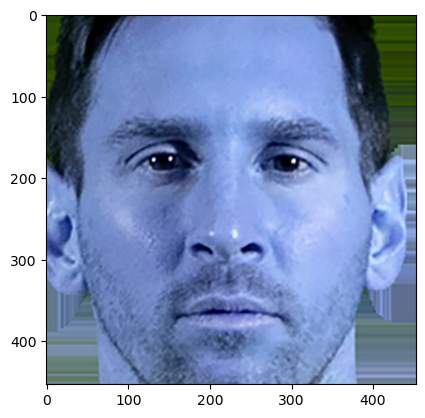

In [17]:
cropped_image = get_cropped_image_if_2_eyes("C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\test_images\\test1.png")
plt.imshow(cropped_image)

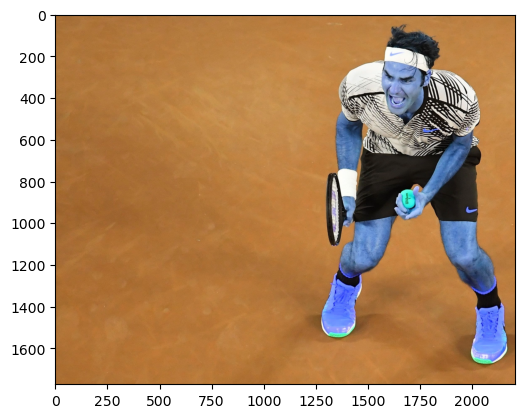

In [18]:
org_image_obstructed = cv2.imread("C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\test_images\\test2.jpg")
plt.imshow(org_image_obstructed)

In [19]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\test_images\\test2.jpg")
cropped_image_no_2_eyes

In [20]:
path_to_data = "C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\dataset"
path_to_cr_data = "C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\crop"

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\dataset\\lionel messi',
 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\dataset\\ms dhoni',
 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\dataset\\roger federer',
 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\dataset\\ronaldo',
 'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\dataset\\virat kohli']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [24]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)  # Get the name of the celebrity from the directory
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('png', 'jpg', 'jpeg')):
            try:
                roi_color = get_cropped_image_if_2_eyes(entry.path)
                if roi_color is not None:
                    cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                    if not os.path.exists(cropped_folder):
                        os.makedirs(cropped_folder)
                        cropped_image_dirs.append(cropped_folder)
                        print("Generating cropped images in folder:", cropped_folder)
                    
                    cropped_file_name = f"{celebrity_name}{count}.png"
                    cropped_file_path = os.path.join(cropped_folder, cropped_file_name) 
                    
                    cv2.imwrite(cropped_file_path, roi_color)
                    celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                    count += 1    
            except Exception as e:
                print(f"Error processing image: {entry.path}. Error: {e}")
        else:
            print(f"Skipping non-image file: {entry.path}")

# Output the results for verification
print("Cropped image directories:")
for dir in cropped_image_dirs:
    print(dir)

print("\nCelebrity file names dictionary:")
for celeb, files in celebrity_file_names_dict.items():
    print(f"{celeb}: {len(files)} files")


lionel messi
Generating cropped images in folder: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\crop\lionel messi
ms dhoni
Generating cropped images in folder: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\crop\ms dhoni
Skipping non-image file: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\dataset\ms dhoni\Dhoni.jpg.crdownload
roger federer
Generating cropped images in folder: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\crop\roger federer
ronaldo
Generating cropped images in folder: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\crop\ronaldo
Skipping non-image file: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\dataset\ronaldo\Cristiano_Ronaldo_Portugal_2023.jpg.crdownload
Skipping non-image file: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\dataset\ronaldo\nassrs-portuguese-forward-cristiano-ronal

In [25]:
import numpy as np
import pywt

In [26]:
def w2d(img, mode='haar', level=1):
    imArray = img
    # Datatype conversions
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H


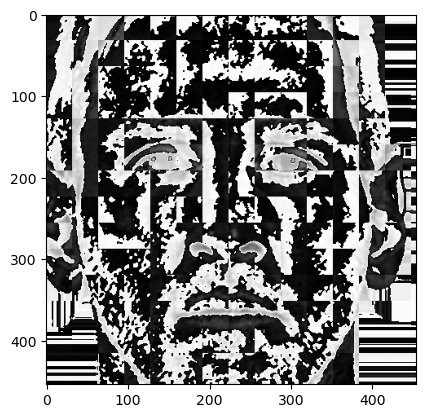

In [27]:
is_har = w2d(cropped_image,'db1',5)
plt.imshow(is_har ,cmap='gray')

In [28]:
celebrity_file_names_dict

{'lionel messi': ['C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\crop\\lionel messi\\lionel messi1.png',
  'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\crop\\lionel messi\\lionel messi2.png',
  'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\crop\\lionel messi\\lionel messi3.png',
  'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\crop\\lionel messi\\lionel messi4.png',
  'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\crop\\lionel messi\\lionel messi5.png',
  'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\crop\\lionel messi\\lionel messi6.png',
  'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\crop\\lionel messi\\lionel messi7.png',
  'C:\\Users\\prana\\Desktop\\Anaconda\\ML\\Sports_celebrity_Classification\\model\\crop\\lionel messi\\lionel messi

In [29]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1

class_dict

{'lionel messi': 0,
 'ms dhoni': 1,
 'roger federer': 2,
 'ronaldo': 3,
 'virat kohli': 4}

In [30]:
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    print(f"Processing {celebrity_name} with {len(training_files)} files")
    for training_image in training_files:
        print(f"Reading image: {training_image}")
        img = cv2.imread(training_image)
        if img is None:
            print(f"Image {training_image} is None, skipping.")
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        x.append(combined_img.flatten())  # Flatten the combined image before appending
        y.append(class_dict[celebrity_name])
        print(f"Appended image for {celebrity_name}")

Processing lionel messi with 40 files
Reading image: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\crop\lionel messi\lionel messi1.png
Appended image for lionel messi
Reading image: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\crop\lionel messi\lionel messi2.png
Appended image for lionel messi
Reading image: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\crop\lionel messi\lionel messi3.png
Appended image for lionel messi
Reading image: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\crop\lionel messi\lionel messi4.png
Appended image for lionel messi
Reading image: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\crop\lionel messi\lionel messi5.png
Appended image for lionel messi
Reading image: C:\Users\prana\Desktop\Anaconda\ML\Sports_celebrity_Classification\model\crop\lionel messi\lionel messi6.png
Appended image for lionel messi
Reading image: C:\Users\pr

In [31]:
x[0]

array([217, 182, 188, ...,  23, 126, 117], dtype=uint8)

In [32]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(150, 4096)

In [33]:
x[0]

array([217., 182., 188., ...,  23., 126., 117.])

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 40)

pipe = Pipeline([('scaler',StandardScaler()) , ('svc' , SVC(kernel = 'rbf' , C=10 ))])
pipe.fit(x_train , y_train)
pipe.score(x_test , y_test)

0.6842105263157895

In [36]:
print(classification_report(y_test , pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         6
           3       0.60      1.00      0.75        12
           4       0.86      1.00      0.92         6

    accuracy                           0.68        38
   macro avg       0.55      0.60      0.55        38
weighted avg       0.57      0.68      0.60        38



C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [39]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [41]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.724506,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.544269,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.706719,{'logisticregression__C': 1}


In [ ]:
#svm - 0.72 is on validation set that is one generated by spliting training set

In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [44]:
best_estimators['svm'].score(x_test , y_test)  #this is on test set

0.7631578947368421

In [45]:
best_estimators['logistic_regression'].score(x_test , y_test)

0.7368421052631579

In [46]:
best_clf = best_estimators['svm']

In [50]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[6, 2, 0, 2, 0],
       [1, 4, 0, 0, 0],
       [0, 1, 3, 1, 0],
       [0, 1, 0, 9, 0],
       [0, 0, 1, 0, 7]], dtype=int64)

In [56]:
import joblib

In [60]:
#Save trained model
joblib.dump(best_clf ,'saved_model.pkl')

['saved_model.pkl']

In [63]:
#Save class dictionary
import json
with open("class_dictionary.json", "w") as f:
    json.dump(class_dict, f)
